In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('all')

plt.style.use('ggplot')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

# Datasets

In [ ]:
df = pd.read_csv('datasets.csv')
df.head(5)

,ID,Rating,Text,Review Likes,Date,User
0,1,4,im amazed this campus looks very modern with t...,2,2 years ago,"{\n ""name"": ""Gusti Ayu Adeliadesi Pradnyandar..."
1,2,5,"undhira x stiki\n\nmodern hall, cozy vibes, fr...",1,3 years ago,"{\n ""name"": ""Made Indiana"",\n ""link"": ""https..."
2,3,1,"Nothing much to say about this place, it's loo...",18,6 years ago,"{\n ""name"": ""Dwi Arya Pradana"",\n ""link"": ""h..."
3,4,5,Cool,0,a year ago,"{\n ""name"": ""I Nengah Suarna"",\n ""link"": ""ht..."
4,5,5,Great place to learn and enjoying green enviro...,1,4 years ago,"{\n ""name"": ""I Made Marthana Yusa"",\n ""link""..."


In [ ]:
df.shape

(436, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            436 non-null    int64 
 1   Rating        436 non-null    int64 
 2   Text          436 non-null    object
 3   Review Likes  436 non-null    int64 
 4   Date          436 non-null    object
 5   User          436 non-null    object
dtypes: int64(3), object(3)
memory usage: 20.6+ KB


# Quick EDA

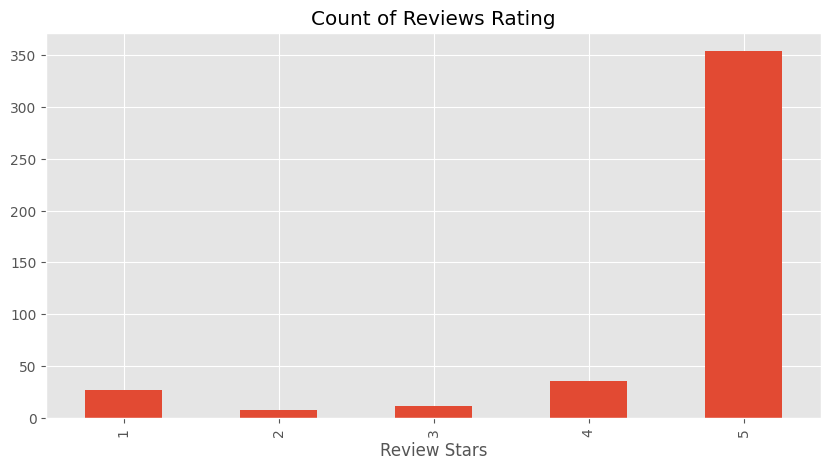

In [ ]:
ax = df['Rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews Rating',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

# Basic NLTK

In [ ]:
example = df['Text'][130]
print(example)

Best Institute of Business and Technology in Bali 


In [ ]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Best', 'Institute', 'of', 'Business', 'and', 'Technology', 'in', 'Bali']

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Best', 'NNP'),
 ('Institute', 'NNP'),
 ('of', 'IN'),
 ('Business', 'NNP'),
 ('and', 'CC'),
 ('Technology', 'NNP'),
 ('in', 'IN'),
 ('Bali', 'NNP')]

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (PERSON Best/NNP Institute/NNP)
  of/IN
  (ORGANIZATION Business/NNP)
  and/CC
  (ORGANIZATION Technology/NNP)
  in/IN
  (GPE Bali/NNP))


# VADER Sentiment Scoring
We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [ ]:
# Check the polarity scores func on our text example
# Kinda Positive Example
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.6369}

In [ ]:
# Kinda Negative Example
sia.polarity_scores(df['Text'][1])

{'neg': 0.0, 'neu': 0.696, 'pos': 0.304, 'compound': 0.8478}

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  text = row['Text']
  myid = row['ID']
  res[myid] = sia.polarity_scores(text)

  0%|          | 0/436 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'ID'})
vaders = vaders.merge(df, how='left')

In [ ]:
vaders.head()

,ID,neg,neu,pos,compound,Rating,Text,Review Likes,Date,User
0,1,0.0,0.816,0.184,0.9686,4,im amazed this campus looks very modern with t...,2,2 years ago,"{\n ""name"": ""Gusti Ayu Adeliadesi Pradnyandar..."
1,2,0.0,0.696,0.304,0.8478,5,"undhira x stiki\n\nmodern hall, cozy vibes, fr...",1,3 years ago,"{\n ""name"": ""Made Indiana"",\n ""link"": ""https..."
2,3,0.1,0.704,0.196,0.8600,1,"Nothing much to say about this place, it's loo...",18,6 years ago,"{\n ""name"": ""Dwi Arya Pradana"",\n ""link"": ""h..."
3,4,0.0,0.000,1.000,0.3182,5,Cool,0,a year ago,"{\n ""name"": ""I Nengah Suarna"",\n ""link"": ""ht..."
4,5,0.0,0.545,0.455,0.8176,5,Great place to learn and enjoying green enviro...,1,4 years ago,"{\n ""name"": ""I Made Marthana Yusa"",\n ""link""..."


# Plot VADER Result

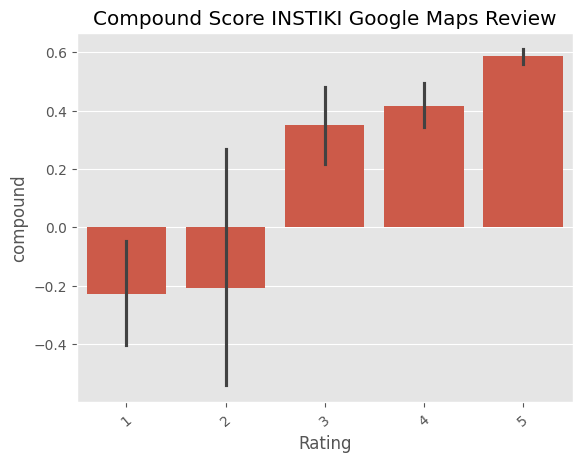

In [ ]:
# Compound result on every Rating
ax = sns.barplot(data=vaders, x='Rating', y='compound')
ax.set_title('Compound Score INSTIKI Google Maps Review')
plt.xticks(rotation = 40)
plt.show()

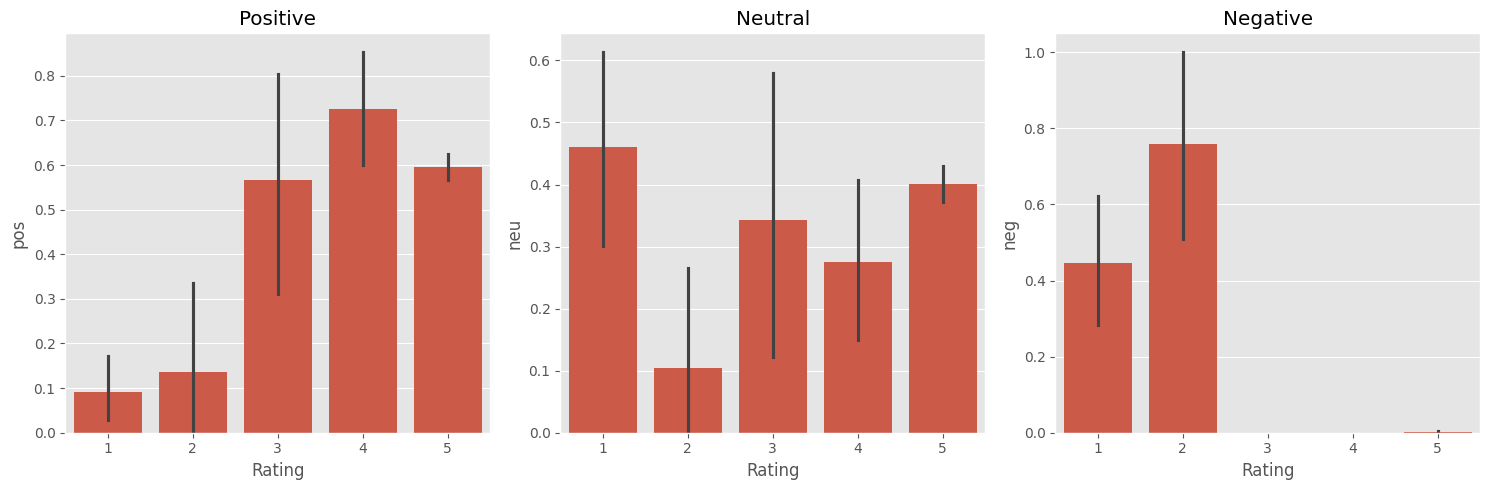

In [ ]:
# See the different Sentiment result from pos, neu, neg according to the Rating
fig, axs = plt.subplots(1, 3, figsize=(15,5))
sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Rating', y='neg', ax=axs[2])

axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Roberta Pretrained Model

In [ ]:
!pip download transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.5/705.5 kB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.1/774.1 kB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.1/142.1 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Import model
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
# Call Roberta model
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
# This is Example from VADER
print(example)
sia.polarity_scores(example)

Best Institute of Business and Technology in Bali 


{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.6369}

In [ ]:
# Example to do neg, neu, pos analysis with Roberta
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0025997066, 'roberta_neu': 0.12188787, 'roberta_pos': 0.8755125}


In [ ]:
# Put it on func, so it can used on several example
def polarity_scores_roberta(example):
  encoded_text = tokenizer(example, return_tensors='pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
      'roberta_neg' : scores[0],
      'roberta_neu' : scores[1],
      'roberta_pos' : scores[2]
  }
  return scores_dict

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  try:
    text = row['Text']
    myid = row['ID']
    vader_result = sia.polarity_scores(text)
    vader_result_rename = {}

    for key, value in vader_result.items():
      vader_result_rename[f"vader_{key}"] = value

    roberta_result = polarity_scores_roberta(text)
    both = {**vader_result_rename, **roberta_result}
    res[myid] = both
  except RuntimeError:
    print(f"Broke for id {myid}")

  0%|          | 0/436 [00:00<?, ?it/s]

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index':'ID'})
results_df = results_df.merge(df, how='left')

# Comparing Scores between VADER & Roberta models

In [ ]:
results_df.columns

Index(['ID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Rating', 'Text',
       'Review Likes', 'Date', 'User'],
      dtype='object')

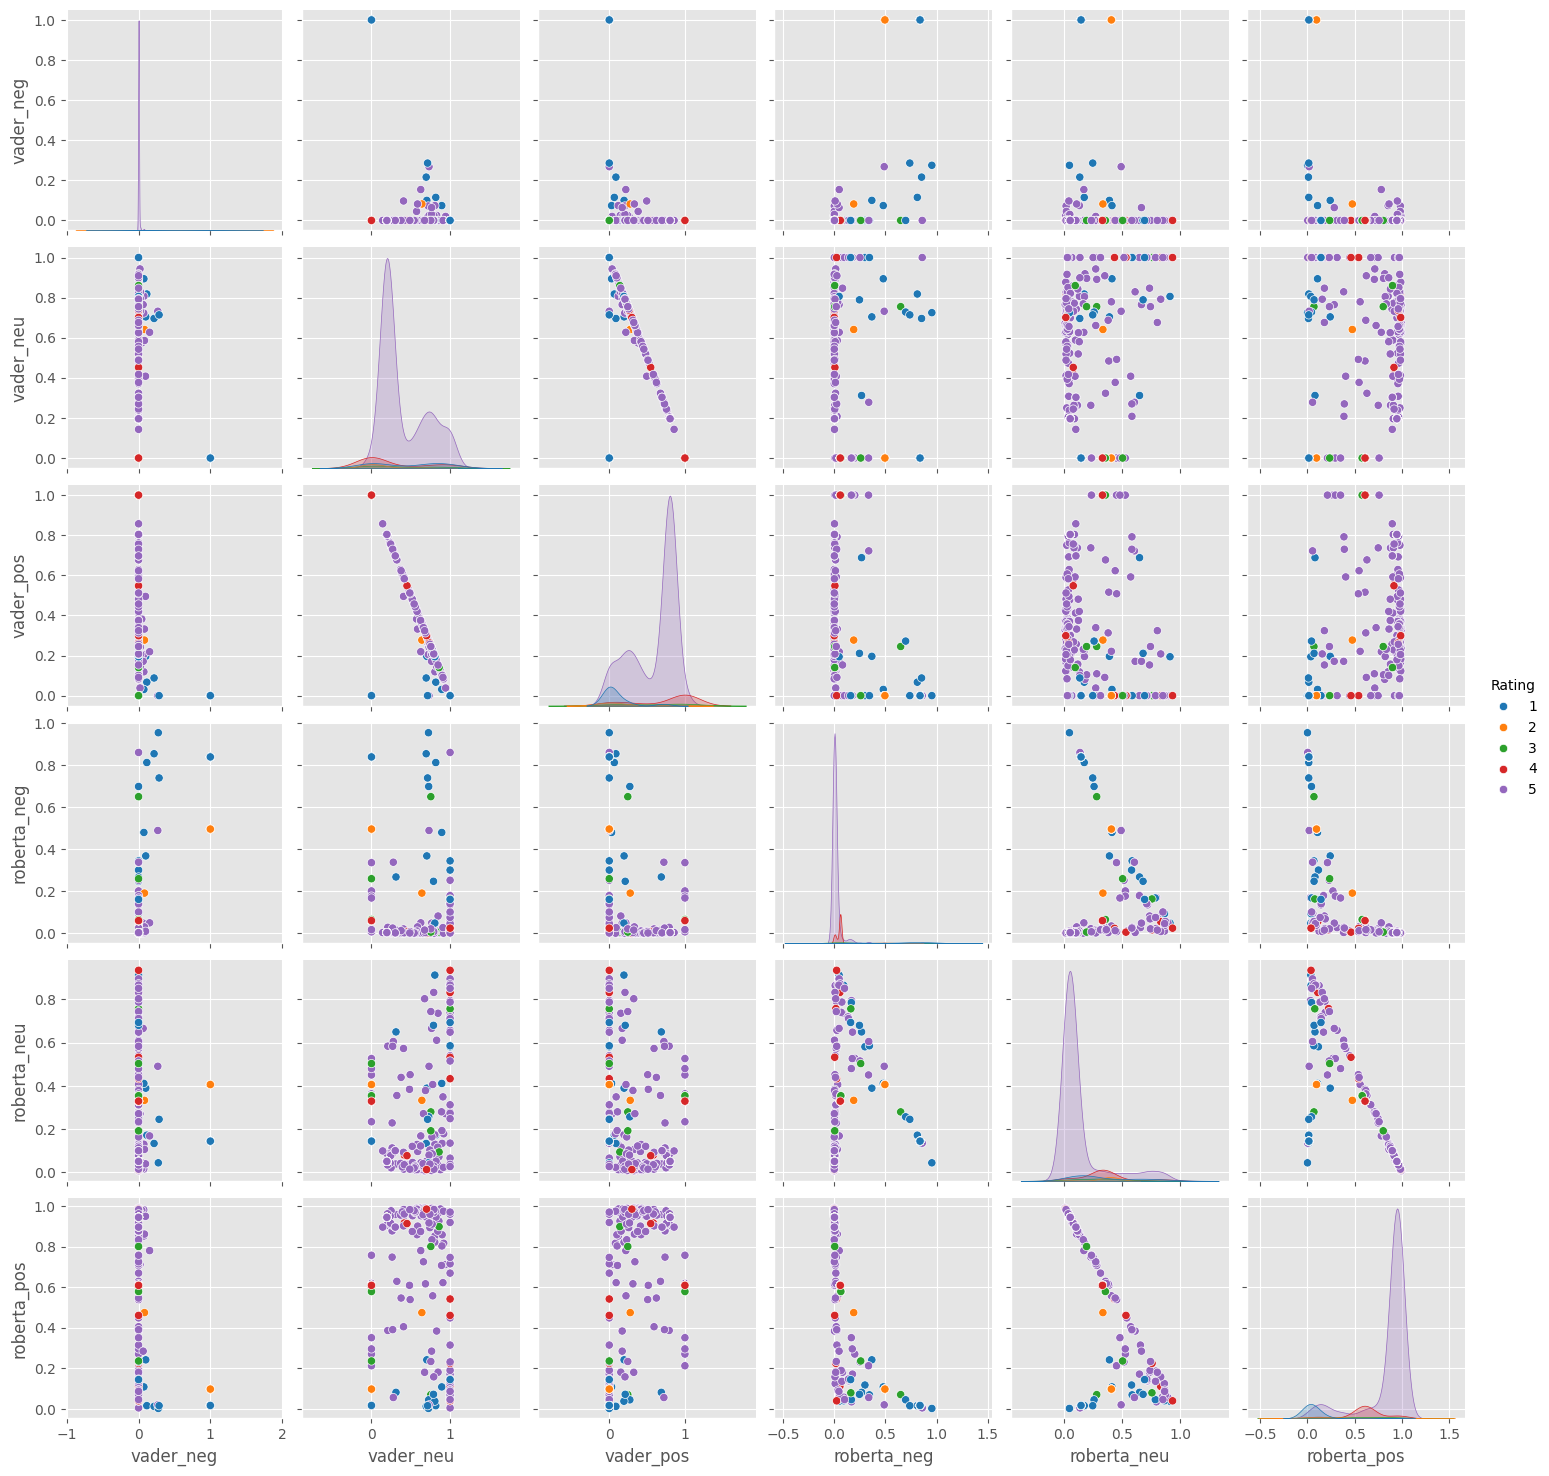

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Rating',
            palette='tab10')
plt.show()

# Review Bias Example
Let's see some of the examples where the model scoring and the review is not on the same lane.

In [ ]:
results_df.query('Rating == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

'Nice campus'

In [ ]:
results_df.query('Rating == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'Nice campus'

In [ ]:
results_df.query('Rating == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'A campus that is thick with a system of shortcomings'

In [ ]:
results_df.query('Rating == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'Multimedia majors are there no journalism, sis?'